## ANALISIS MULTIVARIADO DEL PROYECTO : ML RISKY ROUTE

In [1]:
#Importamos los paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

El dataset a utilizar representa las rutas y clousters por país para todos los envíos.

In [2]:
#Importo el data set y visualizo las primeras filas.
df=pd.read_csv("C:/Users/mmartorana/Downloads/CoderHouse/Data_set.csv", sep=",")
df.head()

,SHP_SHIPMENT_ID,SIT_SITE_ID,SHP_DATE_SHIPPED_ID,SHP_LG_ROUTE_ID,SHP_LG_FACILITY_ID,SHP_LG_CLUSTER_ID,SHP_LG_STATUS,SHP_LG_SUB_STATUS,SHP_LOGISTIC_CENTER_ID,PICKING_TYPE,...,LAST_UPDATED,SHP_COMPANY_NAME,SHP_LG_VEHICLE_PLATE_ID,SHP_LG_VEHICLE_TYPE,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,Driver,SHP_ORDER_COST_USD,Volumen
0,40584763561,MLA,2021-06-01,2469456,SRO1,R2,on_route,delivered,ARXCF1,XD,...,2021-06-01,Mail Express,GNJ475,Fiorino,34908,18.51,22.09,Cesar Sfilio,84.53,1000.0
1,40588014662,MLA,2021-05-21,2421940,SRO1,R1,on_route,delivered,ARXCF1,XD,...,2021-05-21,Mail Express,MQN418,Fiorino,32122,39.63,24.98,Vicente Teves,6.69,19980.0
2,40591308028,MLA,2021-05-21,2422031,SRO1,R3,on_route,delivered,ARXCF1,XD,...,2021-05-21,Mail Express,HJD603,Fiorino,33129,33.09,27.25,Silvina Deseta,14.13,9300.0
3,40592260086,MLA,2021-05-22,2437529,SRO1,R1,on_route,delivered,ARBA01,XD,...,2021-05-26,Mail Express,AA303FZ,Fiorino,34649,21.38,31.00,Locret German,66.82,29160.0
4,40591198804,MLA,2021-05-21,2422038,SRO1,R4,on_route,delivered,ARBA01,XD,...,2021-05-21,Mail Express,AB382BK,Fiorino,139993,53.71,37.55,Analia Pineschi,56.69,4862.0


In [3]:
df["SHP_LG_SUB_STATUS"].value_counts()

delivered          989136
return               1474
stolen                 98
sorting                80
lost                   67
problem_solving         4
delivered_place         3
for_return              3
claimed                 2
route_cancelled         1
damaged                 1
Name: SHP_LG_SUB_STATUS, dtype: int64

Nuestra variable target son todos aquellos substatus relacionados a un siniestro atribuible en la ruta.: Stolen, lost, damaged, etc.

In [4]:
#Generamos las estadisticas descriptivas habituales.
df.describe()

,SHP_SHIPMENT_ID,SHP_LG_ROUTE_ID,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,SHP_ORDER_COST_USD,Volumen
count,9.908690e+05,9.908690e+05,990869.000000,987025.000000,981576.000000,990844.000000,989706.000000
mean,4.077058e+10,2.923925e+06,98796.314494,90.063584,36.333330,59.806649,8665.666855
std,1.099877e+08,3.514478e+05,56204.429428,2597.317191,14.460724,115.645035,11456.905470
min,4.038852e+10,2.384714e+06,27841.000000,0.000000,8.800000,0.000000,1.000000
25%,4.067647e+10,2.633669e+06,49367.000000,20.540000,27.250000,17.427500,1870.000000
50%,4.076206e+10,2.848814e+06,81247.000000,36.900000,32.980000,35.100000,4860.000000
75%,4.086582e+10,3.130102e+06,140833.000000,56.890000,41.930000,60.570000,10360.000000
max,4.097386e+10,3.604359e+06,327179.000000,250403.820000,347.750000,12022.830000,343000.000000


In [5]:
df.shape

(990869, 21)

Generamos el campo SINISTER para tener un campo buleano 1 y 0 para comprender si tuvo un siniestro o no.

In [6]:
def set_values(row,value):
    return value[row]
dictionary={'stolen':1,'lost':1,'claimed':1,'damaged':1,'route_cancelled':1,'delivered':0,'return':1,'sorting':0,'sorting':0,'problem_solving':0,'delivered_place':0,'for_return':0,}
df['SINISTER']=df['SHP_LG_SUB_STATUS'].apply(set_values, args=(dictionary, ))
df

,SHP_SHIPMENT_ID,SIT_SITE_ID,SHP_DATE_SHIPPED_ID,SHP_LG_ROUTE_ID,SHP_LG_FACILITY_ID,SHP_LG_CLUSTER_ID,SHP_LG_STATUS,SHP_LG_SUB_STATUS,SHP_LOGISTIC_CENTER_ID,PICKING_TYPE,...,SHP_COMPANY_NAME,SHP_LG_VEHICLE_PLATE_ID,SHP_LG_VEHICLE_TYPE,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,Driver,SHP_ORDER_COST_USD,Volumen,SINISTER
0,40584763561,MLA,2021-06-01,2469456,SRO1,R2,on_route,delivered,ARXCF1,XD,...,Mail Express,GNJ475,Fiorino,34908,18.51,22.09,Cesar Sfilio,84.53,1000.0,0
1,40588014662,MLA,2021-05-21,2421940,SRO1,R1,on_route,delivered,ARXCF1,XD,...,Mail Express,MQN418,Fiorino,32122,39.63,24.98,Vicente Teves,6.69,19980.0,0
2,40591308028,MLA,2021-05-21,2422031,SRO1,R3,on_route,delivered,ARXCF1,XD,...,Mail Express,HJD603,Fiorino,33129,33.09,27.25,Silvina Deseta,14.13,9300.0,0
3,40592260086,MLA,2021-05-22,2437529,SRO1,R1,on_route,delivered,ARBA01,XD,...,Mail Express,AA303FZ,Fiorino,34649,21.38,31.00,Locret German,66.82,29160.0,0
4,40591198804,MLA,2021-05-21,2422038,SRO1,R4,on_route,delivered,ARBA01,XD,...,Mail Express,AB382BK,Fiorino,139993,53.71,37.55,Analia Pineschi,56.69,4862.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990864,40971916000,MLA,2021-11-16,3601979,SRO1,R1,on_route,delivered,ARBA01,FBM,...,Mail Express,HNU389,Fiorino,74131,18.04,19.60,Martin Sanchez,778.87,44100.0,0
990865,40970893782,MLA,2021-11-15,3594083,SCF2,E2,on_route,delivered,ARBA01,FBM,...,Mail Express,AA092EA,Fiorino,45654,42.73,26.98,Walter Acosta,33.93,3136.0,0
990866,40966491637,MLA,2021-11-16,3602126,SRO1,R4,on_route,delivered,ARXCF1,XD,...,Mail Express,AA285CJ,Fiorino,74123,56.27,44.62,Cristina Elichabe,6.98,4375.0,0
990867,40970605988,MLA,2021-11-16,3602147,SRO1,R6,on_route,delivered,ARXCF1,XD,...,Mail Express,AB367SA,Fiorino,141671,50.53,34.70,Martin Rey,39.81,5460.0,0


Tenemos 1643 siniestro de 989226  

In [7]:
df["SINISTER"].value_counts()

0    989226
1      1643
Name: SINISTER, dtype: int64

## Scatter plot
____________________

Empezamos con nuestro analisis multivariado acortando el dataset.

In [8]:
df = df[df['SHP_ORDER_COST_USD'] < 200]
dfd = df[df['SHP_LG_CALCULATED_DISTANCE'] < 1000]
dfdd = dfd[df['SHP_LG_PLANNED_DISTANCE'] < 1000]

Text(0.5, 1.0, 'ORDER COST VS SUBSTATUS')

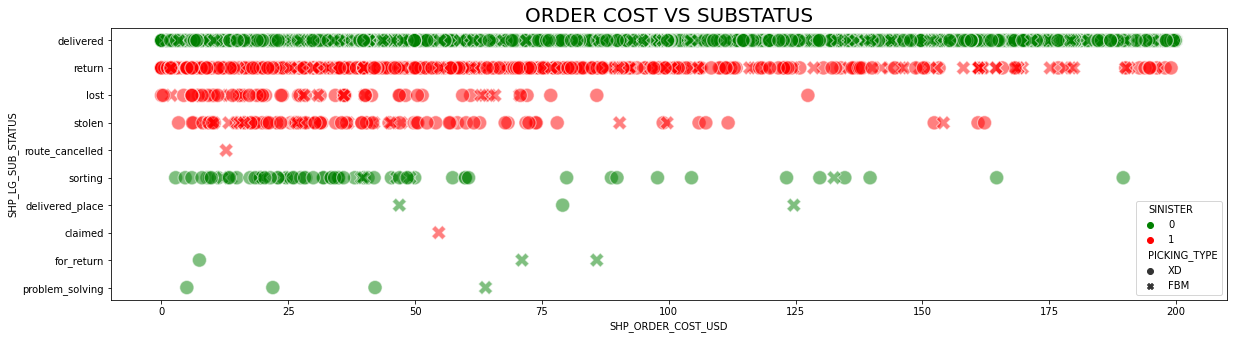

In [9]:
p={1:'red',0:'green'}
plt.figure(figsize=(20,5))
sns.scatterplot(x="SHP_ORDER_COST_USD",y="SHP_LG_SUB_STATUS",data=dfdd,hue="SINISTER",style='PICKING_TYPE',s=200,alpha=0.5,palette=p)
plt.xlabel('SHP_ORDER_COST_USD')
plt.ylabel('SHP_LG_SUB_STATUS')
plt.title('ORDER COST VS SUBSTATUS',fontsize=20)

### Distribution

Veamos histograma de las distancias planeadas a recorrer.

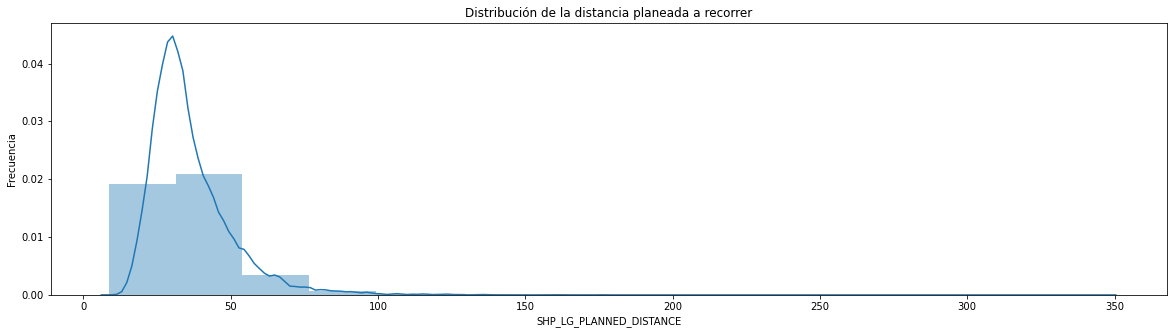

In [10]:
plt.figure(figsize=(20,5))
sns.distplot(dfdd.SHP_LG_PLANNED_DISTANCE, kde=True, hist=True, bins=15)
plt.xlabel('SHP_LG_PLANNED_DISTANCE')
plt.ylabel('Frecuencia')
plt.title('Distribución de la distancia planeada a recorrer')
plt.show()

Comparemos contra distancia recorrida.

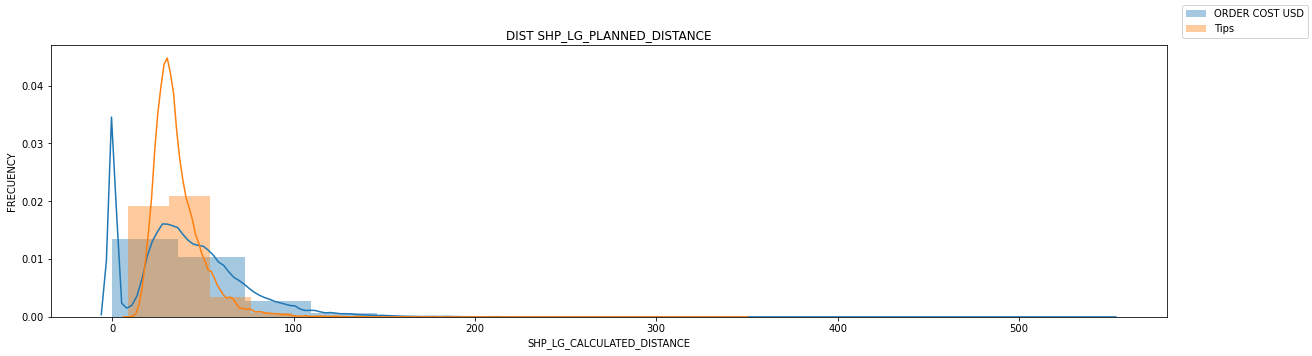

In [11]:
fig = plt.figure(figsize=(20,5))
sns.distplot(dfdd .SHP_LG_CALCULATED_DISTANCE, kde=True, hist=True, bins=15, label='ORDER COST USD')
sns.distplot(dfdd.SHP_LG_PLANNED_DISTANCE, kde=True, hist=True, bins=15, label='Tips')
fig.legend()
plt.xlabel('SHP_LG_CALCULATED_DISTANCE')
plt.ylabel('FRECUENCY')
plt.title('DIST SHP_LG_PLANNED_DISTANCE')
plt.show()

## Violinplot

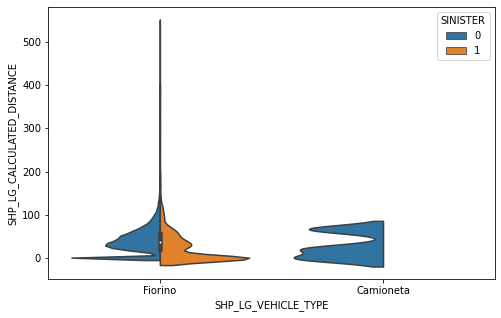

In [12]:
plt.figure(figsize=(8,5))
sns.violinplot(x='SHP_LG_VEHICLE_TYPE',y='SHP_LG_CALCULATED_DISTANCE', hue='SINISTER',data=dfdd,split=True)
plt.show()